In [1]:
import importlib
import heapq
import random

import CsvToExchangeData
import ExchangeData
import Regression
import Expremo

import matplotlib.pyplot as plt
import numpy as np

importlib.reload(CsvToExchangeData)
importlib.reload(ExchangeData)
importlib.reload(Regression)
importlib.reload(Expremo)

<module 'Expremo' from 'C:\\Users\\Gaudium\\Desktop\\уник\\2КУРС\\4СЕМ\\ТПР\\курсач\\прог\\Expremo.py'>

In [2]:
nlmk_data = CsvToExchangeData.exchange_data_list_from_csv("Прошлые данные - NLMK.csv", ExchangeData.ExchangeDataType.Stock, "NLMK")
nlmk_data.reverse()
for stock in nlmk_data:
    # print(stock)
    pass

In [3]:
moex_data = CsvToExchangeData.exchange_data_list_from_csv("Прошлые данные - ММВБ – Индекс Мосбиржи.csv", ExchangeData.ExchangeDataType.Stock, "MOEX")
moex_data.reverse()
for index in moex_data:
    # print(index)
    pass

In [4]:
Regression.DEBUG = False
test_data = nlmk_data

time = [i+1 for i in range(len(nlmk_data))]
# time = [data.date.timestamp() for data in nlmk_data]
price = [float(nlmk_data[i].price) for i in range(len(nlmk_data))]

RegressionType.Power


C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:74: RuntimeWarning: divide by zero encountered in divide
  return lambda v1: (coefficients[0] / v1 + coefficients[1])[0]
C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:134: RuntimeWarning: divide by zero encountered in log
  return lambda v1: (coefficients[0] * np.log(v1) + coefficients[1])[0]


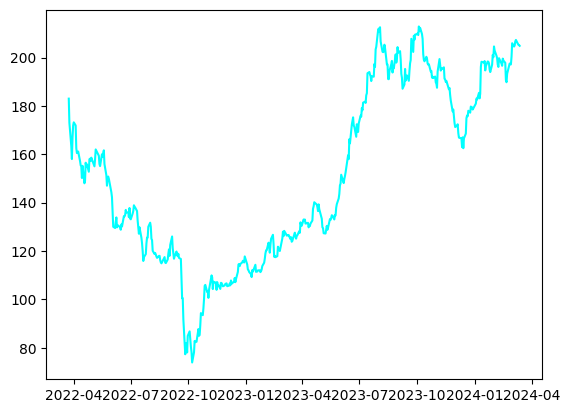

In [5]:
# nlmk_prediction = Regression.fit_best_regression(price, time)
prediction_func = Regression.fit_regression(price, time, Regression.RegressionType.Power)
prediction_set = [prediction_func(i) for i in time]

plt.plot([data.date for data in nlmk_data], price, color='cyan')
# plt.plot([data.date for data in nlmk_data], prediction_set, color='red')
# plt.gca().invert_xaxis()
# plt.show()
print(Regression.get_best_regression_type(time, price))
# print(prediction_set)

C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:43: RuntimeWarning: overflow encountered in scalar add
  a = np.matrix(np.array([[sum(x ** 4), sum(x ** 3), sum(x ** 2)],
C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:44: RuntimeWarning: overflow encountered in scalar add
  [sum(x ** 3), sum(x ** 2), sum(x)],
C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:113: RuntimeWarning: divide by zero encountered in power
  return lambda v1: (np.exp(coefficients[0]) * v1**coefficients[1])[0]


135.0911773570961
RegressionType.Quadratic


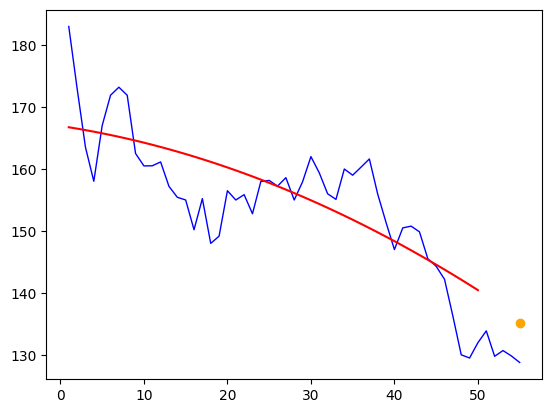

In [6]:
predictor = Expremo.Expremo(price, time)
predictor.set_regression_type(Regression.get_best_regression_type(price, time))

print(predictor.predict(0, 50, 5))
print(predictor.regression_type)
Expremo.plot_prediction(predictor, 5)

175.5027824627212
RegressionType.Quadratic


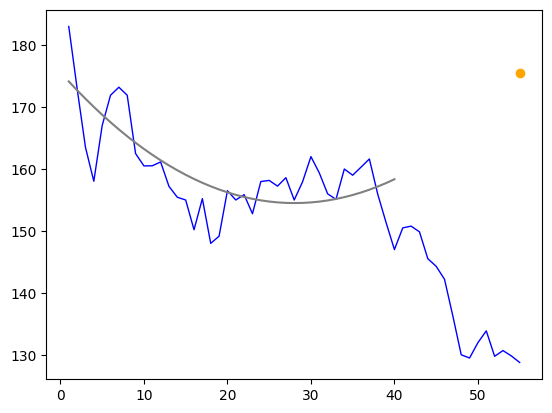

In [7]:
print(predictor.predict(0, 40, 15))
print(predictor.regression_type)
Expremo.plot_prediction(predictor, 15)

In [8]:
print(predictor.predict_trend(0, 50, 5))
print(Expremo.calculate_absolute_prediction_error(predictor, 5))
print(Expremo.calculate_relative_prediction_error(predictor, 5))

TrendType.Downward
4.091177357096086
0.031230361504550275


In [9]:
step = 20
prediction_distance = 3
regression_type = None  # None for best type

Point: 0, RegressionType.Quadratic
Point: 20, RegressionType.Linear
Point: 40, RegressionType.Linear
Point: 60, RegressionType.Linear
Point: 80, RegressionType.Linear
Point: 100, RegressionType.Exponential
Point: 120, RegressionType.Quadratic
Point: 140, RegressionType.Exponential
Point: 160, RegressionType.Exponential
Point: 180, RegressionType.Exponential
Point: 200, RegressionType.Exponential
Point: 220, RegressionType.Exponential
Point: 240, RegressionType.Exponential
Point: 260, RegressionType.Exponential
Point: 280, RegressionType.Exponential
Point: 300, RegressionType.Exponential
Point: 320, RegressionType.Exponential
Point: 340, RegressionType.Quadratic
Point: 360, RegressionType.Quadratic
Point: 380, RegressionType.Linear
Point: 400, RegressionType.Exponential
Point: 420, RegressionType.Quadratic
Point: 440, RegressionType.Exponential
Point: 460, RegressionType.Exponential
Point: 480, RegressionType.Quadratic


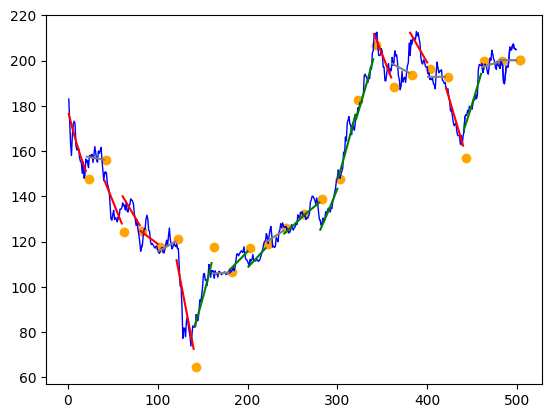

In [10]:
# predictor.add_excluded_type(Regression.RegressionType.Linear)
# predictor.add_excluded_type(Regression.RegressionType.Exponential)
# predictor.add_excluded_type(Regression.RegressionType.Power)
# predictor.add_excluded_type(Regression.RegressionType.Quadratic)

for i in range(0, len(test_data), step):
    predictor.predict(i, step, prediction_distance)
    if regression_type is not None:
        predictor.regression_type = regression_type
        predictor.update_regression_func()

    print(f"Point: {i}, {predictor.regression_type}")
    Expremo.plot_prediction(predictor, prediction_distance)
    
Expremo.plot_prediction(predictor, prediction_distance)

Производим прогнозирование по всем данным

In [11]:
error_results = {}

test_one = False
train_one = 47
prediction_one = 37

step = 5
train_max = 60  # 60
prediction_max = 40  # 40

for train in range(2, train_max, step):
    for prediction in range(2, prediction_max, step):
        abs_sum = 0
        relative_sum = 0
        profit_sum = 0
        correct_trend_count = 0
        count = 0
        
        balance = 0 
        
        if test_one:
            train = train_one
            prediction = prediction_one
        
        for start in range(0, len(test_data), prediction):
            predictor.predict(start, train, prediction)
            
            if start + train + prediction > len(test_data) - 1:
                continue
                
            # if start == 495 and train == 2 and prediction == 2:
            #     pass
                
            absolute_error = Expremo.calculate_absolute_prediction_error(predictor, prediction)
            relative_error = Expremo.calculate_relative_prediction_error(predictor, prediction)
            
            profit = Expremo.calculate_profit(predictor, prediction)            
            is_correct_trend = Expremo.is_correct_trend(predictor, prediction)
            
            trend = predictor.predict_trend(start, train, prediction)
            
            byu_sell_price = predictor.price_data[start + train]
            if trend == Expremo.TrendType.Upward:
                balance -= byu_sell_price
            elif trend == Expremo.TrendType.Downward:
                balance += byu_sell_price            
            
            abs_sum += absolute_error
            relative_sum += relative_error
            profit_sum += profit
            correct_trend_count += is_correct_trend
            count += 1
            
            print(f"Start: {start}, train_dist: {train}, pred_dist: {prediction}, abs: {absolute_error}, relative: {relative_error}, profit: {profit}, correct_trend: {correct_trend_count}/{count}={correct_trend_count / count}, balance: {balance}")
            
        if count == 0:
            continue
            
        
            
        error_results[(train, prediction)] = {"absolute": abs_sum / count,
                                              "relative": relative_sum/count,
                                              "profit": profit_sum/count,
                                              "correct_trend": correct_trend_count/count,
                                              "balance": balance}
        if test_one:
            break
            
    if test_one:
        break
        
print(error_results)

Start: 0, train_dist: 2, pred_dist: 2, abs: 13.999999999999773, relative: 0.08383233532933995, profit: 3.5, correct_trend: 0/1=0.0, balance: 163.5
Start: 2, train_dist: 2, pred_dist: 2, abs: 26.140000000000896, relative: 0.15092378752887353, profit: 6.199999999999989, correct_trend: 0/2=0.0, balance: 330.5
Start: 4, train_dist: 2, pred_dist: 2, abs: 19.635535838510833, relative: 0.1208340666985282, profit: -10.699999999999989, correct_trend: 0/3=0.0, balance: 157.3
Start: 6, train_dist: 2, pred_dist: 2, abs: 8.779999999998239, relative: 0.05469723398952304, profit: -1.9799999999999898, correct_trend: 1/4=0.25, balance: 157.3
Start: 8, train_dist: 2, pred_dist: 2, abs: 0.6999999999987381, relative: 0.004452926208643372, profit: -3.3200000000000216, correct_trend: 2/5=0.4, balance: 157.3
Start: 10, train_dist: 2, pred_dist: 2, abs: 7.387193400955113, relative: 0.04765931226422653, profit: -2.1999999999999886, correct_trend: 3/6=0.5, balance: 157.3
Start: 12, train_dist: 2, pred_dist: 2, 

In [12]:
# Получение списка из минимальных элементов 
min_relative_keys = heapq.nlargest(5, error_results, key=lambda k: error_results[k]["balance"])

# Вывод списка 
for key in min_relative_keys:
    print(f"\n  train_distance: {key[0]}, prediction_distance: {key[1]}")
    print(error_results[key])


  train_distance: 2, prediction_distance: 12
{'absolute': 27.92149312922267, 'relative': 0.1889411518750657, 'profit': 1.0531707317073173, 'correct_trend': 0.2682926829268293, 'balance': 1018.2200000000005}

  train_distance: 2, prediction_distance: 22
{'absolute': 78.74183823190111, 'relative': 0.5957279095887378, 'profit': 1.3545454545454552, 'correct_trend': 0.09090909090909091, 'balance': 421.03999999999996}

  train_distance: 12, prediction_distance: 32
{'absolute': 29.263329869678667, 'relative': 0.19045363983251784, 'profit': 3.156, 'correct_trend': 0.5333333333333333, 'balance': 372.86}

  train_distance: 2, prediction_distance: 7
{'absolute': 21.030680112212913, 'relative': 0.15070481756057372, 'profit': 0.5862857142857142, 'correct_trend': 0.2714285714285714, 'balance': 285.0000000000001}

  train_distance: 7, prediction_distance: 12
{'absolute': 17.93088735880112, 'relative': 0.13524014282631744, 'profit': 0.6405000000000001, 'correct_trend': 0.3, 'balance': 264.25999999999

{'absolute': 27.92149312922267, 'relative': 0.1889411518750657, 'profit': 1.0531707317073173, 'correct_trend': 0.2682926829268293, 'balance': 1018.2200000000005}


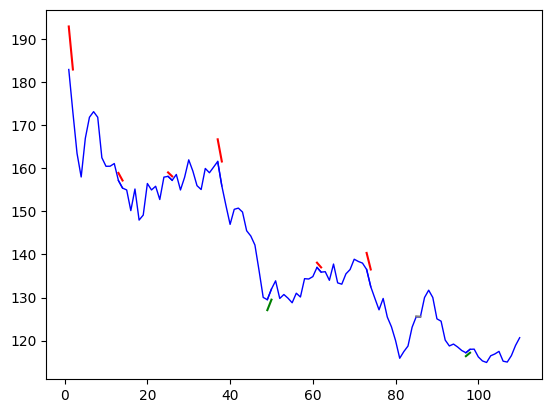

In [13]:
train = 2
pred = 12
print(error_results[(train, pred)])
# print(predictor.predict(0, train, pred))
# print(Expremo.calculate_profit(predictor, pred))
# Expremo.plot_prediction(predictor, pred)
# Expremo.calculate_relative_prediction_error(predictor, pred)

start_max = 100
for start in range(0, start_max, pred):
    predictor.predict(start, train, pred)
    Expremo.plot_prediction(predictor, pred, False)

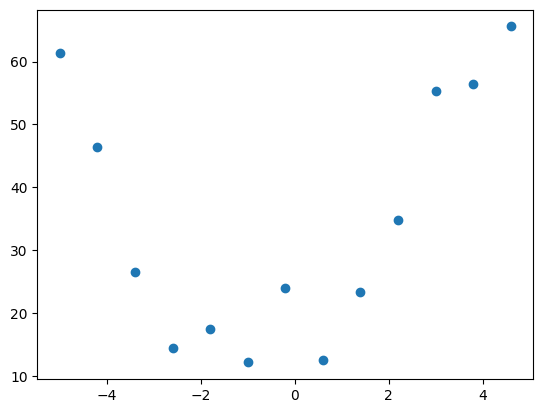

In [14]:
random.seed(0)
def prez_func(x):
    return 2*x**2 + 3*x + 1 + random.random()*30

xs = np.arange(-5, 5, 0.8)
ys = [prez_func(x) for x in xs]

plt.plot(xs, ys, linestyle='', marker='o')

[61.33265554575144, 46.41863208820907, 26.53714742492535, 14.487502508788904, 17.41824164105826, 12.148024123512428, 23.993957671043177, 12.619381782367817, 23.41790862457066, 34.78146118365092, 55.24338655586003, 56.42060567452165, 65.57513533199106]


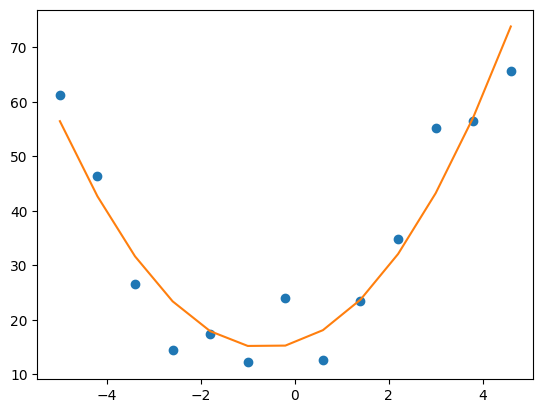

In [15]:
print(ys)
func = Regression.fit_regression(ys, xs, Regression.RegressionType.Quadratic)
plt.plot(xs, ys, linestyle='', marker='o')
plt.plot(xs, [func(x) for x in xs])